# Titanic Passenger Data Analysis

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline


In [58]:
w=pd.read_csv("titanic_data.csv")

### Questions that will be explored with the data 

1.Statistical summary of Age, Passenger Fare<br />
2.How sex of the passenger relates to the survival outcome <br />
3.Statistical significance test on survival outcome from wrangled data <br />
4.How passenger class relates to fare<br />
5.How passenger class relates to age<br />
6.Classwise distribution of survival outcome among passenger class. 


### Data Wrangling 

Taking a look at the data.. 

In [4]:
w.head()
#w.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


There are 891 values in this data of the original 2224 passengers and crew that were onboard on Titanic.  

#### Reassigning 'female' to 1 and 'male to 0 

In [5]:
w['Sex_new'] = w['Sex'].map(lambda x: 0 if x == 'male' else 1)


Looks like there are NaN's in the data. 
Checking to see the number of missing values in each column.. 

In [6]:
w.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Sex_new          0
dtype: int64

'Age column has 177 NaN values,'Cabin' has 687 values and 'Embarked' has 2. Lets take a look at how these NA's are distributed among passenger class and sex. 

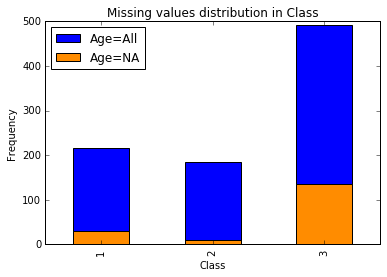

In [213]:
age_na = w[w['Age'].isnull()]
#Extracting rows where Age is equal to NaN, to take a closer look at the data compared to the original sample data 
data=w.groupby(['Pclass']).size().plot(kind='bar',label='Age=All', legend=True)
# Grouping the original sample data by Pclass 
data_age_na=age_na.groupby(['Pclass']).size().plot(kind='bar',color='DarkOrange', legend=True, label='Age=NA', title='Missing values distribution in Class')
# Grouping the age =NaN data by Pclass 
# Plotting the data
data_age_na.set_xlabel('Class')
data_age_na.set_ylabel('Frequency')

From the graph above it can be seen that the distribution of data in the sample is different from the distribution of data from the rows where 'Age' has missing values. Looks like a lot of the NaN values in 'Age' are from the third class. Assuming the original data is a representative sample, it's clear from the above plot that dropping the missing values introduces a bias in drawing any further inferences. 

The correlation matrix shows how 'Age' is related to the other variables. If there are possible predictors for 'Age' from the data

In [8]:
w_age = w[w['Age'].notnull()]
w_age.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_new
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592,-0.024575
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,0.538826
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,-0.155460
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.093254
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,0.103950
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,0.246972
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,0.184994
Sex_new,-0.024575,0.538826,-0.155460,-0.093254,0.103950,0.246972,0.184994,1.000000


Correlations of note are: 
    Survived and Sex_new: 0.5388
    Pclass and Fare: -0.554
    SibSp and ParCh: 0.383
    Pclass and Age : -0.369 
    Pclass and Survived: -0.359 
    Age and SibSp: -0.308
 
 Age has a negative correlation to two variables, Pclass and SibSp. 
 As Age increases Pclass decreases and vicecersa. 
 As Age increases SibSp decreases and viceversa
 A linear gression model with Pclass and SibSp can help predict 'Age' variable. But for the purpose of this report, the NA rows in 'Age' and 'Embarked' column will be dropped. Since the 'Cabin' column will not be used for analysis in this report, it will be dropped.   

In [9]:
dropped_data=w.dropna(subset=['Age','Embarked'],how='any')
#Drops rows(default axis = 0) from 'Age' and 'Embarked' marked NaN. The dataframe now has 712 rows as expected. 
new_data=dropped_data.dropna(how='any',axis=1)
#Drops columns where any data has NA's. Cabin is the only column with NaN. 
new_data.shape, dropped_data.shape
#new_data will be used for all further analysis. 

((712, 12), (712, 13))

### Exploring Data

#### Looking at Age statistics in the data... 

In [68]:
new_data.Age.describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Mean Age is about 30 with std deviation of 14.45. 
Plotting age distribution..   

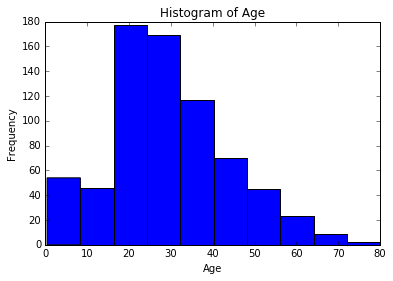

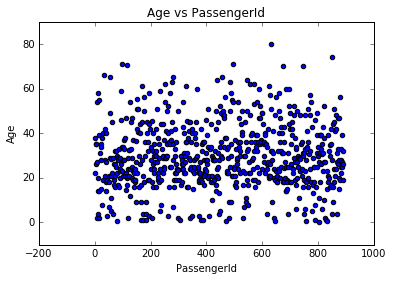

In [214]:
new_data.Age.plot(kind='hist', title='Histogram of Age among All passengers').set_xlabel('Age'),
new_data.plot(x='PassengerId',y='Age',kind='scatter', title='Age vs PassengerId')


Age distribution among passengers who survived.. 

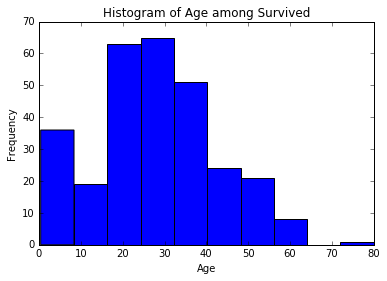

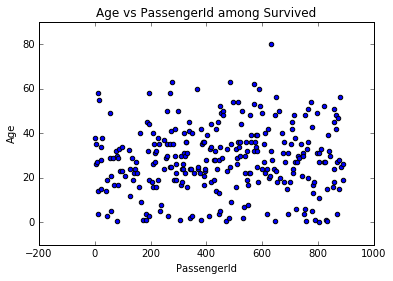

In [215]:
new_data[new_data['Survived'] == 1].Age.plot(kind='hist', title='Histogram of Age among Survived').set_xlabel('Age'),
new_data[new_data['Survived'] == 1].plot(x='PassengerId',y='Age',kind='scatter',title='Age vs PassengerId among Survived')


The plot is similar to that of the overall passenger distrubtion. The percentage of passengers survived, younger than 10 years is relatively grater than the rest of the age brackets. 

#### Exploring Fare statistics 

In [69]:
new_data.Fare.describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

Mean fare is 34.6 with std deviation if 52.9, which is greater than the mean fare. The max fare is 512.32 and min fare is zero. 
Taking a look at the fare = 0 entries to see if there are any missing values. 

In [130]:
new_data[new_data['Fare']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_new
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,0
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,0
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,S,0
822,823,0,1,"Reuchlin, Jonkheer. John George",male,38.0,0,0,19972,0.0,S,0


In [99]:
new_data[new_data['Ticket']=='LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_new
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,S,0
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,S,0
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,S,0
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,S,0


There are total of 7 passengers who havent been charged for a ticket. Three of them have LINE for a ticket number. It might be that these passengers belong to the crew in third class. The rest of the passengers have a ticket number and are traveling in first class.They do not have any SibSp or Parch which means they are traveling alone.   

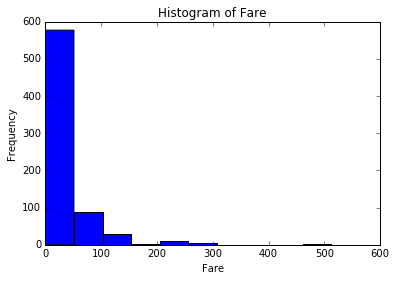

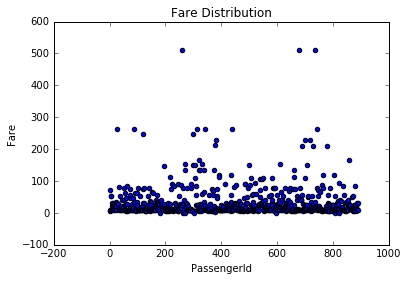

In [145]:
new_data.Fare.plot(kind='hist', title='Histogram of Fare').set_xlabel('Fare'),
new_data.plot(x='PassengerId',y='Fare',kind='scatter',title='Fare Distribution')


From the plots it can be seen that there are a lot of people that paid less than 50 per ticket, belonging to the third/second class and these form the majority of the passengers. 

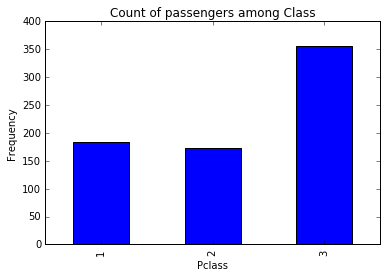

In [177]:
x = new_data.groupby(['Pclass']).Sex_new.count().plot(kind='bar',title='Count of passengers among Class').set_ylabel('Frequency')
x


In [10]:
new_data.corr()
#Show the correlation matrix between all variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_new
PassengerId,1.000000,0.029526,-0.035609,0.033681,-0.082704,-0.011672,0.009655,-0.024674
Survived,0.029526,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100,0.536762
Pclass,-0.035609,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893,-0.150826
Age,0.033681,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143,-0.099037
SibSp,-0.082704,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860,0.106296
Parch,-0.011672,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624,0.249543
Fare,0.009655,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000,0.182457
Sex_new,-0.024674,0.536762,-0.150826,-0.099037,0.106296,0.249543,0.182457,1.000000


#### Exploring correlation between 'Survived' and 'Sex_new' 

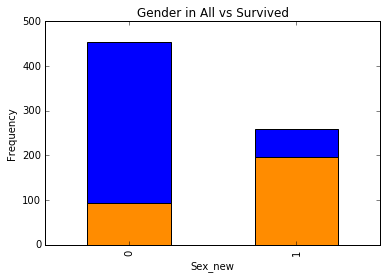

In [211]:
#w_age.plot(x=['Fare'],y=['Pclass'],kind='scatter')
#Here pivot_table is used to aggregate the data instead of groupby and plot is used to generate the graphs
#sex_all=pd.pivot_table(new_data,values=['Survived'],columns=(['Sex_new']),aggfunc=len).plot(kind='bar'),
#sex_sur=pd.pivot_table(new_data,values=['Survived'],columns=(['Sex_new']),aggfunc=sum).plot(kind='bar')
#Plotting relationship between survival outcome and sex. female'1' and male'0'
sex_all=new_data.groupby(['Sex_new']).Survived.size().plot(kind='bar').set_xlabel('Gender'),
sex_sur=new_data[new_data['Survived']==1].groupby(['Sex_new']).Survived.size().plot(kind='bar',color='DarkOrange', title='Gender in All vs Survived').set_ylabel('Frequency')
#sex_all.set_xlabel('Sex')
#sex_all.set_ylabel("Frequency")
#sex_sur.set_xlabel('Sex')
#sex_sur.set_ylabel("Frequency")


The first graph shows the total distribution of men and women. It can be seen that there were more men than women passengers onboard Titanic. The legend can be read as Female - '1' and Male - '0'. 
The plot in orange shows the distribution of men and women among survivors. It can be seen how the numbers flipped from the graph above. There were more women passengers among survivors than men. 

The high correlation between Survived and Sex_new shows that as Sex_new (Female: '1' and Male: '0') increases, Survived increases and viceversa as can be seen from the graph in orange. 



#### Testing the hypothesis that more women survived than men 

From the sample list of titanic passengers, we can test the hypothesis that more women than men survived.  
Assuming a normal distribution of the population, we begin to test the hypothesis.  
As we assigned Female: '1' and Male to '0'. The  proportion of female passengers is the mean of 'Sex_new'.  
Null hypothesis (H0): (Proportion of female passengers) p = 0.5  
Alternate hypothesis (H1): (Proportion of female passengers) p > 0.5 
This leads to a one-tail rejection region. With 5% significance alpha = 0.05 
Rejection region is zstat > z(alpha)
(.05) = 1.645 

In [142]:
#Isolating the gender stats from the 'Sex_new' column. 
gender_stats = new_data[new_data['Survived'] ==1].describe().Sex_new
p_female = gender_stats['mean']
#Z-statistic is calculated 
zstat = (p_female - 0.5)/np.sqrt(0.5*(1-0.5)/gender_stats['count'])
zstat



6.0104076400856554

zstat = 6.01 > z(alpha) = 1.645 
Since zstat falls in the rejection region, we have to reject the null hypothesis that the population proportion of female passengers = 0.5. 
With more than 95% confidence it can be concluded that more women survived than men. 
This is historically accurate from the "women and children first" protocol that was followed on Titanic while loading the lifeboats, which resulted in disproportionately more men being left onboard than women waiting for their turn before the ship eventually sank. 

#### Exploring other correlations...

Correlation between Fare and Passenger class

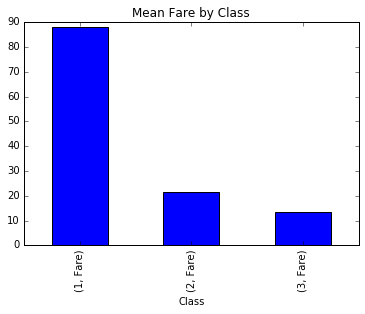

In [210]:
pd.pivot_table(new_data,values=['Fare'],columns=(['Pclass']),aggfunc=np.mean).unstack().plot(kind='bar',title='Mean Fare by Class').set_xlabel('Class')

The graph shows the mean fare for all passengers in each passenger class. 
High negative correlation between Fare and Passenger class is expected since the price of the ticket increased as passenger class decreased. Here correlation does not mean causation, to infer causation further analysis would be required. 

#### Correlation between Age and Passenger class

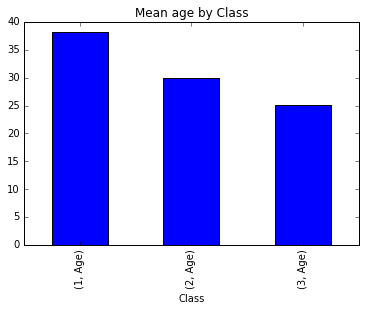

In [209]:
pd.pivot_table(new_data,values=['Age'],columns=(['Pclass']),aggfunc=np.mean).unstack().plot(kind='bar',title='Mean age by Class').set_xlabel('Class')


It seems from the graph above that as passenger class increases average age in the class decreases. This is simply a correlation between the variable and does not imply that passenger class or age are related.  

#### Exploring the class wise distribution of people onboard who survived vs who didnt. 

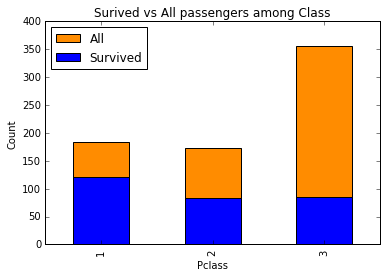

In [184]:
new_data_sur = new_data[new_data['Survived'] == 1] # Subset of people who survived 
#df = pd.dataframe({'All':w.groupby(['Pclass']),'Survived':w_sur.groupby(['Pclass'])}, columns=['All','Survived'])
new_data.groupby(['Pclass']).size().plot(kind='bar', color = 'DarkOrange', legend = True, label='All'),
new_data_sur.groupby(['Pclass']).size().plot(kind='bar', legend = True, label='Survived',title='Surived vs All passengers among Class').set_ylabel('Count')


It seems from the graph that a large percentage of people from third class did not survive compared to first class and second class. Even in mere numbers though the majority of passengers traveled in third class, number of people survived in first class is greater then the number from third class.    

### Conclusions 

The original data contained 891 rows of which there were missing values from Age, Cabin and Emabarked columns. The missing values from Age were removed in data wrangling. The missing values could be predicted from other variables like SibSp and Pclass which show some correlation to age. This removal of data might have introduced bias in the statistical tests and other correlations performed with the cleaned data. 
The age of the sample has a mean of ~ 30. The majority of the passengers traveled in third class and the mean fare paid was 34.6 pounds. A high negative correlation exists between Fare and Passenger class as expected since the price of the ticket increased as passenger class decreased. Passenger class also shows a negative correlation to average age in the class. This is simply a correlation between the variable and does not imply that passenger class or age are related.
The total distribution of men and women shows that more men than women passengers were onboard Titanic but there were more women passengers among survivors than men. A hypothesis test showed that with more than 95% confidence it can be concluded that more women survived than men. This is historically accurate from the "women and children first" protocol that was followed on Titanic while loading the lifeboats, which resulted in disproportionately more men being left onboard than women waiting for their turn before the ship eventually sank. 

Limitations: The data presented here only 891 rows of original data consisting of 2224 passengers. The data may or may not be a representative sample of the original data. Missing values from Age further limited the number of rows in the data as the missing values were removed. A prediction model for Age could be built upon to improve upon the analysis and accuracy of inferences.     
.


#### References used 

1. http://pandas.pydata.org/
2. http://stackoverflow.com/     